# Communication and Collusion in Oligopoly Market Experiments: A Meta-Study using Machine Learning

# 

# Natural Language Processing

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install nltk
    !pip install spacy
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn
    !pip install openpyxl

In [2]:
import pandas as pd
import nltk
import spacy
import numpy as np
import csv
import re
import seaborn as sns

In [3]:
from nltk import ngrams
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from pprint import pprint

In [4]:
DownloadAdditions = False
if DownloadAdditions:
    nltk.download('stopwords')
    spacy.cli.download('de_core_news_lg')

In [5]:
nlp = spacy.load('de_core_news_lg')

In [6]:
sns.set_theme(style="whitegrid")

## Seed

In [7]:
seed = 42

## Read the data

Set the path

In [8]:
path = 'C:/Users/Maximilian Andres/Nextcloud2/Collusion Meta Study/Data Analysis'
#path = '/Users/birteprado/Documents/02 Uni/02 Master/Master Thesis/05 BigData/04 Target Table/02 Target Tables/Target_GrSe.xlsx'

Read the data according to the path

In [9]:
df = pd.read_excel(path+'/Data/03 BigData/04 Target Table/02 Target Tables/Target_GrSe.xlsx')

In [10]:
df = df[df['AvgMatchNo'] == 1]

Columns in the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 958
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudyID            399 non-null    int64  
 1   Author             399 non-null    object 
 2   Title              399 non-null    object 
 3   Year               399 non-null    int64  
 4   Journal            399 non-null    object 
 5   SingleGroup        399 non-null    int64  
 6   Session            399 non-null    int64  
 7   Group              399 non-null    int64  
 8   AvgMatchNo         399 non-null    int64  
 9   CoundOneCoopvar1   399 non-null    float64
 10  CoundOneCoopvar2   399 non-null    float64
 11  CoundAllCoopvar1   399 non-null    float64
 12  CoundAllCoopvar2   399 non-null    float64
 13  T                  399 non-null    float64
 14  R                  399 non-null    float64
 15  S                  399 non-null    float64
 16  P_1                399 non-null

Preview of the data

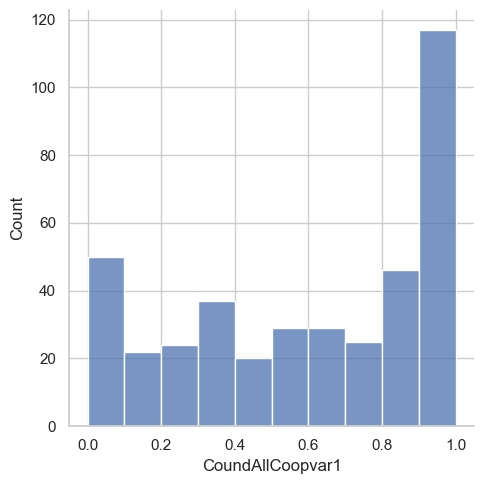

In [12]:
sns.displot(data=df, x='CoundAllCoopvar1')

In [13]:
df.head()

,StudyID,Author,Title,Year,Journal,SingleGroup,Session,Group,AvgMatchNo,CoundOneCoopvar1,...,Infinite,ExchangeRate,Fine,FineAlpha,Rematch,AllChat_Original,AllChat_Cleaned,AllChat_Cleaned2,AllChat_PriceKeys,CommTreat
0,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001001001,1,1,1,0.074074,...,1,3.33,1,0.15,0,"""bitte alle auf 110""""ja""""ja man """"dann hat jed...","""Bitte alle auf 110""""Ja""""Ja man""""Dann hat jede...","""Bitte alle auf 110""""Ja""""Ja man""""Dann hat jede...","""Bitte alle auf JointProfitPrice""""Ja""""Ja man""""...",1
1,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001002001,1,2,1,0.666667,...,1,3.33,1,0.15,0,"""alle 110""""ja sehr gut""""was ist mit besprechen...","""Alle 110.""""Ja, sehr gut.""""Was ist mit Besprec...","""Alle 110.""""Ja, sehr gut.""""Was ist mit Besprec...","""Alle JointProfitPrice.""""Ja, sehr gut.""""Was is...",1
2,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001003001,1,3,1,0.583333,...,1,3.33,1,0.15,0,"""alle immer 110""""ja""""und wenn keiner meldet, i...","""Alle immer 110.""""Ja""""Und wenn keiner meldet, ...","""Alle immer 110.""""Ja""""Und wenn keiner meldet, ...","""Alle immer JointProfitPrice.""""Ja""""Und wenn ke...",1
3,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001004001,1,4,1,1.000000,...,1,3.33,1,0.15,0,"""Hi""""Jeder 110 dann verdient jeder 3 Punkte = ...","""Hi""""Jeder 110, dann verdient jeder 3 Punkte i...","""Hi""""Jeder 110, dann verdient jeder 3 Punkte i...","""Hi""""Jeder JointProfitPrice, dann verdient jed...",1
4,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001005001,1,5,1,1.000000,...,1,3.33,1,0.15,0,"""Sind alle drei da?^^""""ale 110 eingeben jede r...","""Sind alle drei da? happysmiley""""Alle 110 eing...","""Sind alle drei da? happysmiley""""Alle 110 eing...","""Sind alle drei da? happysmiley""""Alle JointPro...",1


Number of independent observation per study and treatment

In [14]:
print("no. of indep. obs in 201:", len(df[(df['StudyID'] == 201)]))

print("no. of indep. obs in 202:", len(df[(df['StudyID'] == 202)]))
#print("no. of indep. obs in 202 low cost 1:", len(df[(df['StudyID'] == 202) & (df['Type'] == 1)]))
#print("no. of indep. obs in 202 high cost 2:", len(df[(df['StudyID'] == 202) & (df['Type'] == 2)]))

print("no. of indep. obs in 203:", len(df[(df['StudyID'] == 203)]))
print("no. of indep. obs in 203, GroupSize 2:", len(df[(df['StudyID'] == 203) & (df['GroupSize'] == 2)]))
print("no. of indep. obs in 203, GroupSize 4:", len(df[(df['StudyID'] == 203) & (df['GroupSize'] == 4)]))
print("no. of indep. obs in 203, GroupSize 6:", len(df[(df['StudyID'] == 203) & (df['GroupSize'] == 6)]))

print("no. of indep. obs in 205:", len(df[(df['StudyID'] == 205)]))
print("no. of indep. obs in 205, GroupSize 2:", len(df[(df['StudyID'] == 205) & (df['GroupSize'] == 2)]))
print("no. of indep. obs in 205, GroupSize 4:", len(df[(df['StudyID'] == 205) & (df['GroupSize'] == 4)]))

print("no. of indep. obs in 210:", len(df[(df['StudyID'] == 210)]))
print("no. of indep. obs in 210, 1 market:", len(df[(df['StudyID'] == 210) & (df['Treatment'] == "1 market")]))
print("no. of indep. obs in 210, 3 markets:", len(df[(df['StudyID'] == 210) & (df['Treatment'] == "3 markets")]))
print("no. of indep. obs in 210, 4 markets:", len(df[(df['StudyID'] == 210) & (df['Treatment'] == "4 markets")]))

print("no. of indep. obs in 212:", len(df[(df['StudyID'] == 212)]))

print("no. of indep. obs in 213:", len(df[(df['StudyID'] == 213)]))

print("no. of indep. obs in 214:", len(df[(df['StudyID'] == 214)]))
print("no. of indep. obs in 214, SANCTION:", len(df[(df['StudyID'] == 214) & (df['Treatment'] == "SANCTION")]))
print("no. of indep. obs in 214, NoSANCTION:", len(df[(df['StudyID'] == 214) & (df['Treatment'] == "NoSANCTION")]))

print("no. of indep. obs in df:", len(df))

no. of indep. obs in 201: 16
no. of indep. obs in 202: 140
no. of indep. obs in 203: 24
no. of indep. obs in 203, GroupSize 2: 9
no. of indep. obs in 203, GroupSize 4: 9
no. of indep. obs in 203, GroupSize 6: 6
no. of indep. obs in 205: 32
no. of indep. obs in 205, GroupSize 2: 16
no. of indep. obs in 205, GroupSize 4: 16
no. of indep. obs in 210: 77
no. of indep. obs in 210, 1 market: 20
no. of indep. obs in 210, 3 markets: 38
no. of indep. obs in 210, 4 markets: 19
no. of indep. obs in 212: 27
no. of indep. obs in 213: 7
no. of indep. obs in 214: 76
no. of indep. obs in 214, SANCTION: 52
no. of indep. obs in 214, NoSANCTION: 24
no. of indep. obs in df: 399


In [15]:
df.groupby(['Fine'])['CoundAllCoopvar1'].count()

Fine
0    272
1    127
Name: CoundAllCoopvar1, dtype: int64

In [16]:
df.groupby(['Preplay'])['CoundAllCoopvar1'].count()

Preplay
0    155
1    244
Name: CoundAllCoopvar1, dtype: int64

In [17]:
df.groupby(['Infinite'])['CoundAllCoopvar1'].count()

Infinite
0    111
1    288
Name: CoundAllCoopvar1, dtype: int64

In [18]:
df.groupby(['Bertrand'])['CoundAllCoopvar1'].count()

Bertrand
0    275
1    124
Name: CoundAllCoopvar1, dtype: int64

In [19]:
df.groupby(['GroupSize'])['CoundAllCoopvar1'].count()

GroupSize
2    165
3    169
4     59
6      6
Name: CoundAllCoopvar1, dtype: int64

## Pre-Processing of the Corpus

Lemmatization

In [29]:
def lemmatize(statement):
    
    """
    This function is used to lemmatize the corpus. 
    
    """
    
    #define strings which should not be lemmatized
    donotlemmatize = {}#{'A','B'}
    
    #process the corpus using spaCy
    doc = nlp(statement)
    
    #lemmatize the corpus
    lemmas = [token.text.lower() if token.text in donotlemmatize else token.lemma_.lower() for token in doc]
    
    return lemmas
    

Pre-processing function

In [32]:
def preprocess(docs):
    
    """
    This function is used to preprocess the corpus: remove special characters, lemmatize, remove stopwords and correction.
    
    """

    
    #define strings which should not be stopwords
    nostopwords = {''}#{'A', 'B','a', 'b','X', 'Y','x','y'}
    
    #create list of stop words
    stop_words = list(set(stopwords.words('german'))-nostopwords)
    
    #remove special characters which are not german umlaute
    docs = docs.apply(lambda x: "".join(re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', ' ', x)))
    
    #remove all numbers
    docs = docs.apply(lambda x: "".join(re.sub(r'\d+', ' ', x)))
    
    #lemmatize strings
    docs = docs.apply(lambda x: " ".join(lemmatize(x)))
    
    #remove stopwords
    docs = docs.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    
    #re-name code words for studies
    docs = docs.apply(lambda x: "".join(re.sub(r'\bviolett\b', ' ', x)))
    
    #remove specific words for studies
    docs = docs.apply(lambda x: "".join(re.sub(r'\bnashprice\b', ' nashaction ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bjointprofitprice\b', ' jointprofitaction ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bundercuttingprice\b', ' undercuttingaction ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bzeroprice\b', ' zeroaction ', x)))
    
    #specific words for hallo
    docs = docs.apply(lambda x: "".join(re.sub(r'\bhi\b', ' hallo ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bhey\b', ' hallo ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bmoin\b', ' hallo ', x)))

    #specific words for okay
    docs = docs.apply(lambda x: "".join(re.sub(r'\bokay\b', ' ok ', x)))

    #specific words for action
    docs = docs.apply(lambda x: "".join(re.sub(r'\banbieten\b', ' bieten ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\btaler\b', ' punkt ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bmengeneinheiten\b', ' menge ', x)))
    docs = docs.apply(lambda x: "".join(re.sub(r'\bmärkten\b', ' markt ', x)))

    #specific words for haha
    docs = docs.apply(lambda x: "".join(re.sub(r'\bhahaha\b', ' haha ', x)))
    
    return docs

Main

In [33]:
df['document'] = preprocess(df['AllChat_PriceKeys'].astype(str))

In [34]:
df['document']

0      bitte  jointprofitaction  ja ja jointprofit lo...
1       jointprofitaction  ja gut besprechen ok grupp...
2      immer  jointprofitaction  ja melden wahrschein...
3       hallo   jointprofitaction  verdienen jointpro...
4      drei happysmiley  jointprofitaction  eingeben ...
                             ...                        
954    lassen preis gemeinsam  jointprofitaction  hoc...
955    kooperieren klar  jointprofitaction  ok immer ...
956    ab  jointprofitaction  meister umsatz einfach ...
957     hallo   jointprofitaction  nein macht erhöhen...
958    fair vielleicht immer abwechseln sagen firmnum...
Name: document, Length: 399, dtype: object

In [35]:
df['document'][5]

'nan'

Seperate those observations not communicating, i.e., nan

In [36]:
df[df['document'] != 'nan']

,StudyID,Author,Title,Year,Journal,SingleGroup,Session,Group,AvgMatchNo,CoundOneCoopvar1,...,ExchangeRate,Fine,FineAlpha,Rematch,AllChat_Original,AllChat_Cleaned,AllChat_Cleaned2,AllChat_PriceKeys,CommTreat,document
0,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001001001,1,1,1,0.074074,...,3.33,1,0.15,0,"""bitte alle auf 110""""ja""""ja man """"dann hat jed...","""Bitte alle auf 110""""Ja""""Ja man""""Dann hat jede...","""Bitte alle auf 110""""Ja""""Ja man""""Dann hat jede...","""Bitte alle auf JointProfitPrice""""Ja""""Ja man""""...",1,bitte jointprofitaction ja ja jointprofit lo...
1,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001002001,1,2,1,0.666667,...,3.33,1,0.15,0,"""alle 110""""ja sehr gut""""was ist mit besprechen...","""Alle 110.""""Ja, sehr gut.""""Was ist mit Besprec...","""Alle 110.""""Ja, sehr gut.""""Was ist mit Besprec...","""Alle JointProfitPrice.""""Ja, sehr gut.""""Was is...",1,jointprofitaction ja gut besprechen ok grupp...
2,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001003001,1,3,1,0.583333,...,3.33,1,0.15,0,"""alle immer 110""""ja""""und wenn keiner meldet, i...","""Alle immer 110.""""Ja""""Und wenn keiner meldet, ...","""Alle immer 110.""""Ja""""Und wenn keiner meldet, ...","""Alle immer JointProfitPrice.""""Ja""""Und wenn ke...",1,immer jointprofitaction ja melden wahrschein...
3,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001004001,1,4,1,1.000000,...,3.33,1,0.15,0,"""Hi""""Jeder 110 dann verdient jeder 3 Punkte = ...","""Hi""""Jeder 110, dann verdient jeder 3 Punkte i...","""Hi""""Jeder 110, dann verdient jeder 3 Punkte i...","""Hi""""Jeder JointProfitPrice, dann verdient jed...",1,hallo jointprofitaction verdienen jointpro...
4,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001005001,1,5,1,1.000000,...,3.33,1,0.15,0,"""Sind alle drei da?^^""""ale 110 eingeben jede r...","""Sind alle drei da? happysmiley""""Alle 110 eing...","""Sind alle drei da? happysmiley""""Alle 110 eing...","""Sind alle drei da? happysmiley""""Alle JointPro...",1,drei happysmiley jointprofitaction eingeben ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,214,Andres et al.,How communication makes the difference between...,2023,European Economic Review,214016002001,16,2,1,1.000000,...,125.00,0,NaN,0,"""lasst uns den preis gemeinsam auf 9 hoch mach...","""lasst uns den preis gemeinsam auf 9 hoch mach...","""lasst uns den preis gemeinsam auf 9 hoch mach...","""lasst uns den preis gemeinsam auf JointProfit...",1,lassen preis gemeinsam jointprofitaction hoc...
955,214,Andres et al.,How communication makes the difference between...,2023,European Economic Review,214016003001,16,3,1,1.000000,...,125.00,0,NaN,0,"""kooperieren? """"klar""""alle 9?""""ok!""""wenn immer...","""kooperieren? """"klar""""alle 9?""""ok!""""wenn immer...","""kooperieren? """"klar""""alle 9?""""ok!""""wenn immer...","""kooperieren? """"klar""""alle JointProfitPrice?""""...",1,kooperieren klar jointprofitaction ok immer ...
956,214,Andres et al.,How communication makes the difference between...,2023,European Economic Review,214016004001,16,4,1,1.000000,...,125.00,0,NaN,0,"""ab jetzt alle 9""""wir machen alle am meisten u...","""ab jetzt alle 9""""wir machen alle am meisten u...","""ab jetzt alle 9""""wir machen alle am meisten u...","""ab jetzt alle JointProfitPrice""""wir machen al...",1,ab jointprofitaction meister umsatz einfach ...
957,214,Andres et al.,How communication makes the difference between...,2023,European Economic Review,214016005001,16,5,1,0.901961,...,125.00,0,NaN,0,"""so hey""""alle 9?""""nein""""2 mac

The number of unique tokens

In [37]:
len(list(set(" ".join(df[df['document'] != 'nan']['document'].values.tolist()).lower().split(" "))))

5567

## Visualize the documents

Variable for visualization purposes later on

In [38]:
df['AuthorYear'] = df['Author'] + ' (' + df['Year'].astype(str) + ')'

Count the **number of tokens** per document

In [39]:
df['Count'] = df['document'].str.split().str.len()

Descirbe the count per study

In [40]:
df[df['document'] != 'nan'].groupby(['AuthorYear','Preplay'])['Count'].describe()

,,count,mean,std,min,25%,50%,75%,max
AuthorYear,Preplay,,,,,,,,
Andres et al. (2023),0,76.0,297.750000,178.242092,9.0,140.5,297.0,415.75,680.0
Bodnar et al. (2023),0,13.0,44.076923,55.387215,11.0,24.0,30.0,33.00,224.0
Clemens and Rau (2019),1,27.0,246.185185,138.158503,43.0,167.5,203.0,365.50,525.0
Clemens and Rau (2022),0,7.0,248.857143,77.044205,179.0,192.0,234.0,273.00,399.0
Fischer and Normann (2019),1,94.0,16.319149,10.768545,1.0,8.0,15.0,22.75,48.0
Fonseca and Normann (2014),0,31.0,88.903226,74.904986,15.0,34.0,62.0,110.00,265.0
Fonseca et al. (2018),0,24.0,237.291667,141.975956,42.0,125.5,196.0,317.50,540.0
Freitag et al. (2021),1,77.0,41.831169,19.021043,3.0,30.0,41.0,53.00,101.0


Function to plot corpus

In [41]:
def plot_corpus(df, condition, var_of_interest, y_lim, height, aspect):
    
    """
    This function is used to plot the corpus. 
    
    """
    
    g = sns.catplot(data=df.loc[df["Preplay"] == condition], x="AuthorYear", y=var_of_interest, kind='box', color= '#7998C9',
                height=height,aspect=aspect)
    g.set(xlabel=None)
    g.set(ylim=(0, y_lim))

    g.figure.savefig(path + '/Figures/Figure_Corpus_'+var_of_interest+str(condition)+'.pdf', dpi = 300)
    
    return g
    
    

Visualize the documents of studies with pre-play communication

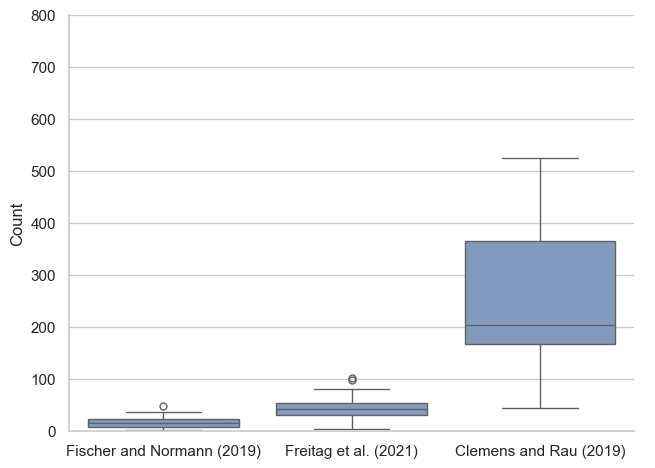

In [42]:
plot_corpus(df=df[df['document'] != 'nan'],
            condition=1,
            var_of_interest='Count',
            y_lim=800, 
            height=5, 
            aspect=1.3)

Visualize the documents of studies with repeated communication

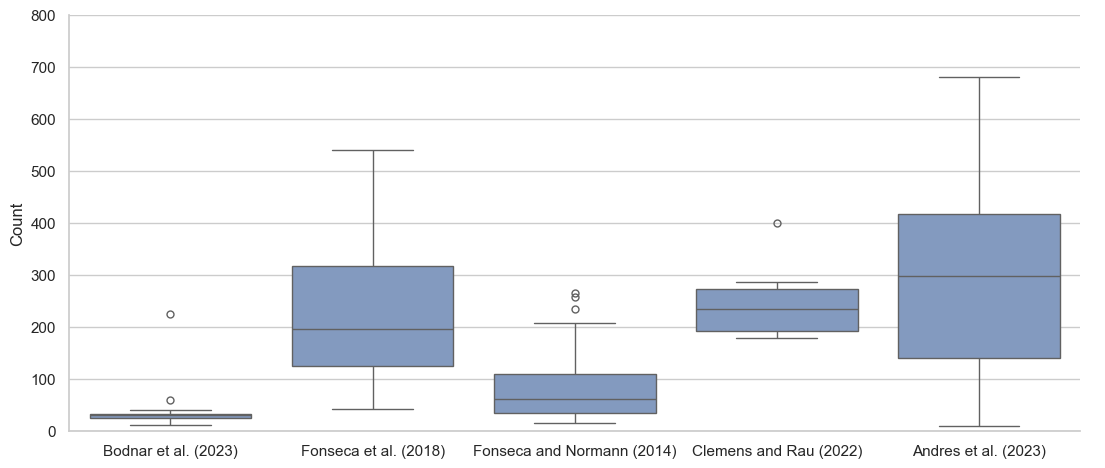

In [43]:
plot_corpus(df=df[df['document'] != 'nan'],
            condition=0,
            var_of_interest='Count',
            y_lim=800, 
            height=5, 
            aspect=2.2)

**Length of documents**

In [44]:
df['Length'] = df['document'].str.len()

Descirbe the length per study

In [45]:
df[df['document'] != 'nan'].groupby(['AuthorYear','Preplay'])['Length'].describe()

,,count,mean,std,min,25%,50%,75%,max
AuthorYear,Preplay,,,,,,,,
Andres et al. (2023),0,76.0,2268.868421,1376.187607,55.0,1042.75,2230.0,3017.25,5352.0
Bodnar et al. (2023),0,13.0,385.538462,505.984291,99.0,225.00,234.0,302.00,2039.0
Clemens and Rau (2019),1,27.0,1898.629630,1076.298327,370.0,1299.00,1585.0,2889.50,4314.0
Clemens and Rau (2022),0,7.0,1813.714286,447.627343,1412.0,1485.50,1593.0,2044.00,2632.0
Fischer and Normann (2019),1,94.0,120.361702,82.660057,1.0,54.25,108.5,174.75,340.0
Fonseca and Normann (2014),0,31.0,757.032258,641.754339,98.0,276.50,525.0,976.00,2152.0
Fonseca et al. (2018),0,24.0,1676.541667,993.242909,281.0,991.00,1326.5,2290.25,3694.0
Freitag et al. (2021),1,77.0,322.584416,145.696183,11.0,233.00,324.0,408.00,764.0


Visualize the documents of studies with pre-play communication

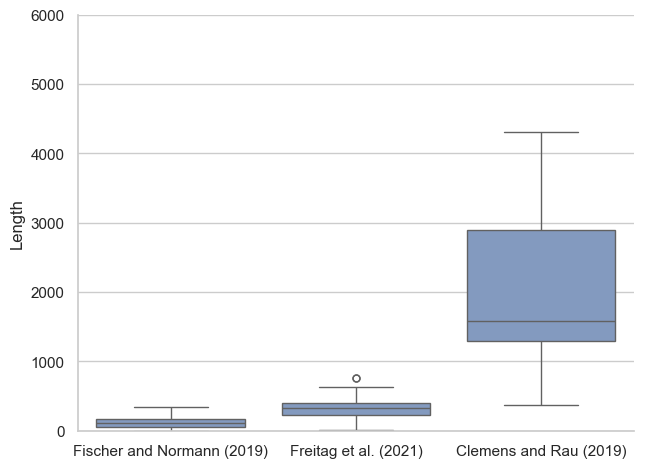

In [46]:
plot_corpus(df=df[df['document'] != 'nan'],
            condition=1,
            var_of_interest='Length',
            y_lim=6000, 
            height=5, 
            aspect=1.3)

Visualize the documents of studies with repeated communication

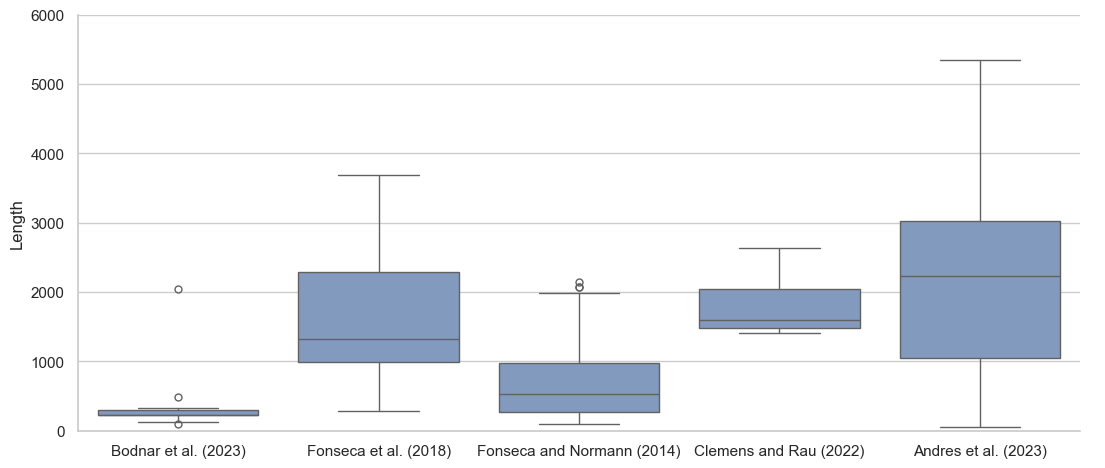

In [47]:
plot_corpus(df=df[df['document'] != 'nan'],
            condition=0,
            var_of_interest='Length',
            y_lim=6000, 
            height=5, 
            aspect=2.2)

## Save the Data Frame

Export the DataFrame to an Excel file

In [48]:
df.to_excel(path + '/Data/Target_GrSe_PP.xlsx', index=False)